# AI_HW03: CNN by Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
import keras
from keras import layers, models, optimizers
from keras.utils import to_categorical

/home/kyle/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
tf.__version__

'1.4.0'

In [3]:
datax = np.load(join('data','MNIST.npy'))
datay = np.load(join('data','Label.npy'))

In [4]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [5]:
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Requirement 1: Data를 train : test로 분할

In [6]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_norm, datay_onehot, test_size=0.3, random_state=111)
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(trnx[0].shape)

(42000, 28, 28)
(18000, 28, 28)
(42000, 10)
(28, 28)


**Sequential API**

In [16]:
input_shape = (28,28,1)

cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16, (2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("PReLU"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(32, (2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(64, (2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 128, activation = "relu"))
cnn_model.add(layers.Dense(units = 10, activation =  "softmax"))

cnn_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

ValueError: Unknown activation function:PReLU

In [8]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
__________

In [9]:
trnx_reshape = trnx.reshape(-1,28,28,1)
tstx_reshape = tstx.reshape(-1,28,28,1)
print(trnx_reshape.shape)

(42000, 28, 28, 1)


In [10]:
history = cnn_model.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size=512, epochs=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 15s 366us/step - loss: 0.6106 - acc: 0.8190 - val_loss: 0.1721 - val_acc: 0.9516
Epoch 2/50
42000/42000 [==============================] - 15s 349us/step - loss: 0.1427 - acc: 0.9553 - val_loss: 0.1092 - val_acc: 0.9708
Epoch 3/50
42000/42000 [==============================] - 14s 344us/step - loss: 0.1026 - acc: 0.9677 - val_loss: 0.0870 - val_acc: 0.9752
Epoch 4/50
42000/42000 [==============================] - 14s 345us/step - loss: 0.0816 - acc: 0.9745 - val_loss: 0.0952 - val_acc: 0.9732
Epoch 5/50
42000/42000 [==============================] - 15s 346us/step - loss: 0.0739 - acc: 0.9766 - val_loss: 0.0768 - val_acc: 0.9771
Epoch 6/50
42000/42000 [==============================] - 14s 345us/step - loss: 0.0615 - acc: 0.9800 - val_loss: 0.0607 - val_acc: 0.9826
Epoch 7/50
42000/42000 [==============================] - 15s 346us/step - loss: 0.0562 - acc: 0.9827 - val_loss: 0.

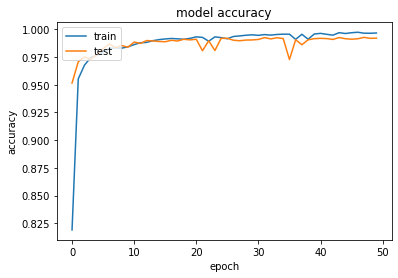

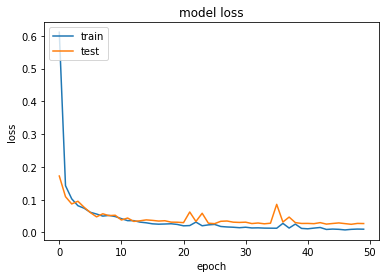

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Funtional API**

In [12]:
input_shape = (28,28,1)

input_tensor = layers.Input(shape = input_shape)

conv1_1 = layers.Conv2D(16, (2,2), padding='same')(input_tensor)
conv1_2 = layers.BatchNormalization()(conv1_1)
conv1_3 = layers.Activation("relu")(conv1_2)
conv1_4 = layers.MaxPooling2D((2,2))(conv1_3)

conv2_1 = layers.Conv2D(32, (2,2), padding='same')(conv1_4)
conv2_2 = layers.BatchNormalization()(conv2_1)
conv2_3 = layers.Activation("relu")(conv2_2)
conv2_4 = layers.Dropout(0.2)(conv2_3)
conv2_5 = layers.MaxPooling2D((2,2))(conv2_4)

conv3_1 = layers.Conv2D(64, (2,2), padding='same')(conv2_5)
conv3_2 = layers.BatchNormalization()(conv3_1)
conv3_3 = layers.Activation("relu")(conv3_2)
conv3_4 = layers.Dropout(0.2)(conv3_3)
conv3_5 = layers.MaxPooling2D((2,2))(conv3_4)

conv4_1 = layers.Conv2D(128, (2,2), padding='same')(conv3_5)
conv4_2 = layers.BatchNormalization()(conv4_1)
conv4_3 = layers.Activation("relu")(conv4_2)
conv4_4 = layers.Dropout(0.2)(conv4_3)


flatted = layers.Flatten()(conv4_4)

dense1 = layers.Dense(128, activation="relu")(flatted)
dense2 = layers.Dense(64, activation="relu")(dense1)
output_class = layers.Dense(10, activation="softmax")(dense2)

cnn_fmodel = models.Model(input_tensor, output_class)
cnn_fmodel.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [13]:
cnn_fmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 32)        128       
__________

In [14]:
history = cnn_fmodel.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size=512, epochs=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 16s 380us/step - loss: 0.4726 - acc: 0.8523 - val_loss: 0.1435 - val_acc: 0.9581
Epoch 2/50
42000/42000 [==============================] - 16s 371us/step - loss: 0.1107 - acc: 0.9646 - val_loss: 0.0922 - val_acc: 0.9731
Epoch 3/50
42000/42000 [==============================] - 16s 370us/step - loss: 0.0838 - acc: 0.9737 - val_loss: 0.0973 - val_acc: 0.9711
Epoch 4/50
42000/42000 [==============================] - 16s 371us/step - loss: 0.0617 - acc: 0.9796 - val_loss: 0.0596 - val_acc: 0.9839
Epoch 5/50
42000/42000 [==============================] - 15s 368us/step - loss: 0.0557 - acc: 0.9825 - val_loss: 0.1008 - val_acc: 0.9654
Epoch 6/50
42000/42000 [==============================] - 15s 366us/step - loss: 0.0489 - acc: 0.9843 - val_loss: 0.0933 - val_acc: 0.9732
Epoch 7/50
42000/42000 [==============================] - 15s 365us/step - loss: 0.0695 - acc: 0.9779 - val_loss: 0.

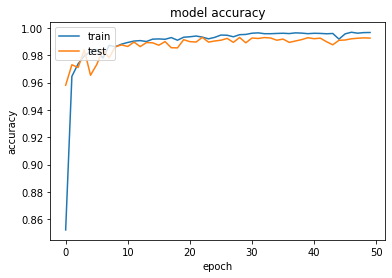

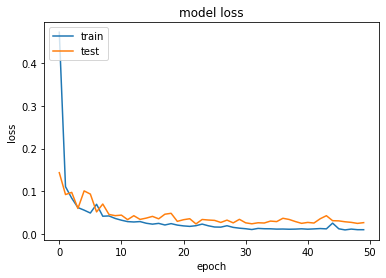

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()